In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [8]:
def marker_plot(n,z,E):
    plt.figure(figsize=(15,10))
    sc1 = plt.scatter(n, z, c=E, marker='o', vmin=0, vmax=7)
    plt.xlabel('N')
    plt.xticks([8,20,28,50,82,126, 198])
    plt.yticks([8,20,28,50,82,110])
    plt.ticklabel_format
    for tick in [8, 20, 28, 50, 82]:
        plt.axvline(x=tick, color='gray', linestyle='--', linewidth=0.5)
        plt.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(x=126, color="gray", linestyle= "--", linewidth = 0.5)
    plt.axvline(x=198, color="gray", linestyle= "--", linewidth = 0.5)
    plt.axhline(y=110, color='gray', linestyle='--', linewidth=0.5)
    plt.ylabel('Z')
    plt.title('Datos de diferencia de energía entre campo medio y su proyección', fontsize=22)
    cbar = plt.colorbar(sc1, label="Diferencia de energía (MeV)")
    cbar.set_label("Diferencia de energía (MeV)", fontsize=20)
    plt.tight_layout()
    plt.show()


In [9]:
data = pd.read_csv("list E.csv", index_col="Unnamed: 0")
Z=data.iloc[:,0].values
N=data.iloc[:,1].values
difE = data.iloc[:,2].values
difE

array([-1.08349711, -2.28034484, -2.79498443, ..., -4.02121971,
       -4.07304257, -3.77964148])

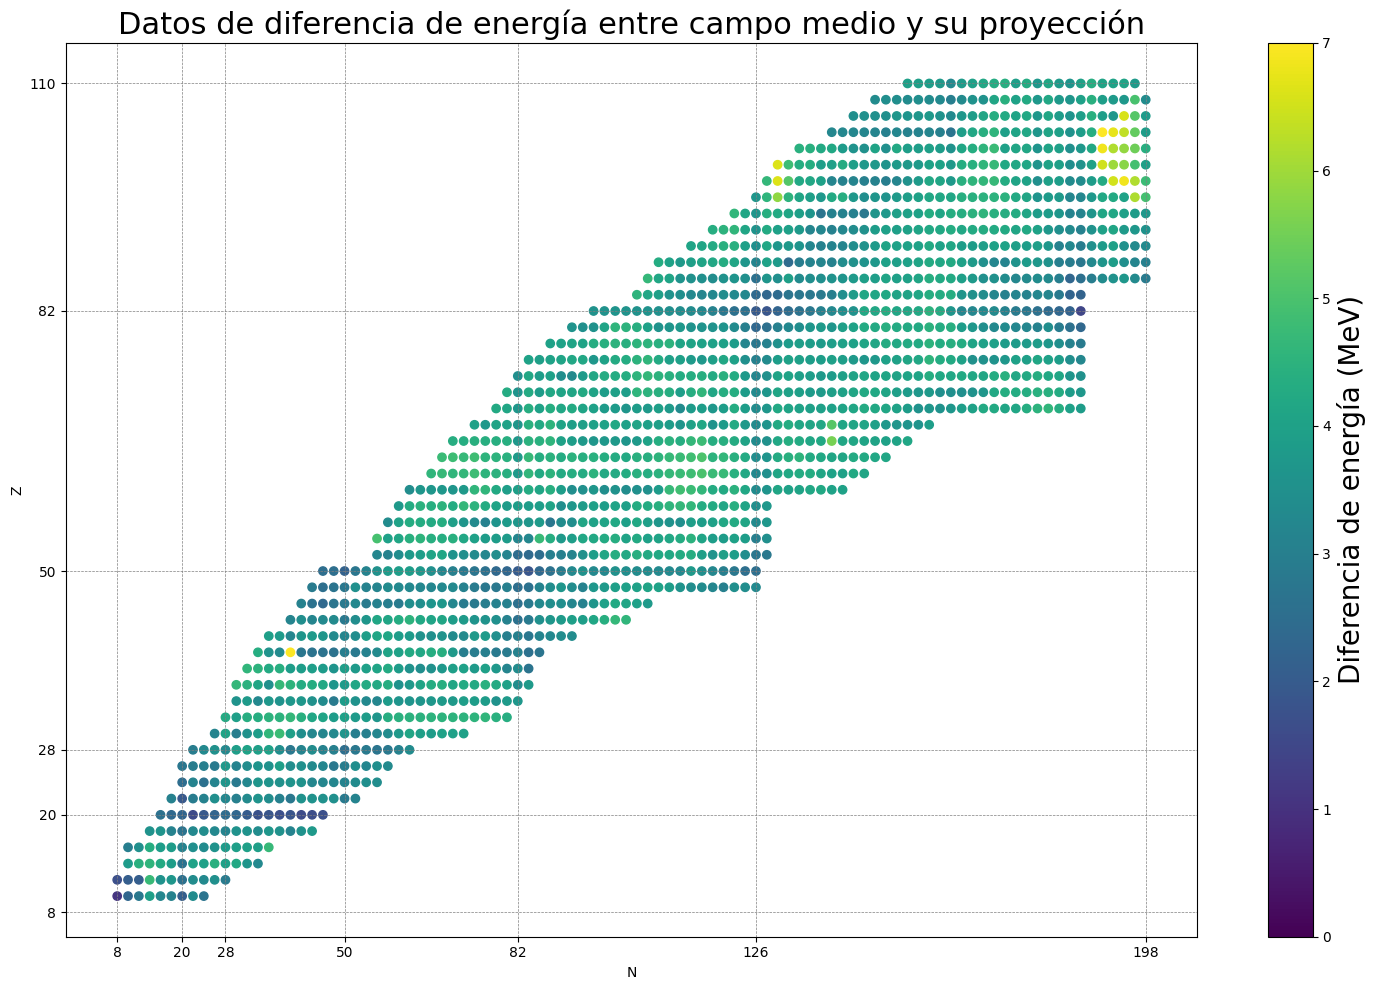

In [10]:
marker_plot(N, Z, np.abs(difE))

In [6]:
data_train = pd.read_csv("difE_adam_train_with_1e_4_80_no_drop.csv", sep=",")
data_test = pd.read_csv("difE_adam_test_with_1e_4_80_no_drop.csv", sep=",")
data = pd.concat([data_test, data_train], axis=0)
data[" difE pred"]
data.columns

Index(['Z', 'N', 'difE real', ' difE pred'], dtype='object')

In [8]:
E_10 = data.loc[data["N"]==10]
E_10

,Z,N,difE real,difE pred
91,10.0,10.0,2.280345,3.716316
558,14.0,10.0,3.823652,0.000000
654,12.0,10.0,2.055880,3.666872
680,16.0,10.0,2.973104,0.000000


In [8]:
data_train2 = pd.read_csv("difE_sgd_train_with_1e_3_50_no_drop.csv", sep=",")
data_test2 = pd.read_csv("difE_sgd_test_with_1e_3_50_no_drop.csv", sep=",")
data2 = pd.concat([data_test2, data_train2], axis=0)
data.columns

Index(['Z', 'N', 'difE real', ' difE pred'], dtype='object')

In [10]:
E_10_2 = data2.loc[data2["N"]==10]
E_10_2

,Z,N,difE real,difE pred
21,16.0,10.0,2.973104,8.932462
283,12.0,10.0,2.055880,3.776511
431,10.0,10.0,2.280345,3.796867
438,14.0,10.0,3.823652,4.031125


In [11]:
E_10_2["diferencia"] = E_10_2.iloc[3] - E_10_2.iloc[2]
E_10_2

C:\Users\pablo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Z,N,difE real,difE pred,diferencia
21,16.0,10.0,2.973104,8.932462,NaN
283,12.0,10.0,2.055880,3.776511,NaN
431,10.0,10.0,2.280345,3.796867,NaN
438,14.0,10.0,3.823652,4.031125,NaN


In [14]:
data_train["diferencia"] = np.abs(data_train.iloc[:,3] - data_train.iloc[:,2])
data_train2["diferencia"] = np.abs(data_train2.iloc[:,3] - data_train2.iloc[:,2])
data_test["diferencia"] = np.abs(data_test.iloc[:,3] - data_test.iloc[:,2])
data_test2["diferencia"] = np.abs(data_test2.iloc[:,3] - data_test2.iloc[:,2])

In [12]:
E_10["diferencia"] = E_10.iloc[:,3] - E_10.iloc[:,2]
E_10

C:\Users\pablo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Z,N,difE real,difE pred,diferencia
91,10.0,10.0,2.280345,3.716316,1.435971
558,14.0,10.0,3.823652,0.000000,-3.823652
654,12.0,10.0,2.055880,3.666872,1.610992
680,16.0,10.0,2.973104,0.000000,-2.973104


In [15]:
print(f"The max training value of Adam is {data_train['diferencia'].max()}")
print(f"The max test value of Adam is {data_test['diferencia'].max()}")
print(f"The max training value of SGD is {data_train2['diferencia'].max()}")
print(f"The max test value of SGD is {data_test2['diferencia'].max()}")

The max training value of Adam is 4.84654919729314
The max test value of Adam is 3.0649049282073975
The max training value of SGD is 6.504167514216304
The max test value of SGD is 5.959357738494873


In [17]:
tol = 0.2

adam_train_count = data_train.loc[data_train['diferencia'] < tol, 'diferencia'].count()
adam_test_count = data_test.loc[data_test['diferencia'] < tol, 'diferencia'].count()
sgd_train_count = data_train2.loc[data_train2['diferencia'] < tol, 'diferencia'].count()
sgd_test_count = data_test2.loc[data_test2['diferencia'] < tol, 'diferencia'].count()

print(f"The count of training values of Adam below {tol} is {adam_train_count}")
print(f"The count of test values of Adam below {tol} is {adam_test_count}")
print(f"The count of training values of SGD below {tol} is {sgd_train_count}")
print(f"The count of test values of SGD below {tol} is {sgd_test_count}")

The count of training values of Adam below 0.2 is 332
The count of test values of Adam below 0.2 is 89
The count of training values of SGD below 0.2 is 225
The count of test values of SGD below 0.2 is 219


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming data_train, data_test, data_train2, and data_test2 are already defined DataFrames

# Function to calculate and print performance metrics
def calculate_metrics(true_values, predicted_values, name):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    
    print(f"{name} Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print()

# Example usage with some example predicted values (replace these with your actual predicted values)
true_values_train = data_train['difE real']
true_values_test = data_test['difE real']
true_values_train2 = data_train2['difE real']
true_values_test2 = data_test2['difE real']

# Replace these with your actual predicted values
predicted_values_train_adam = data_train[' difE pred']  # Example: using true values as predictions
predicted_values_test_adam = data_test[' difE pred']
predicted_values_train_sgd = data_train2[' difE pred']
predicted_values_test_sgd = data_test2[' difE pred']

# Calculate metrics for Adam optimizer
calculate_metrics(true_values_train, predicted_values_train_adam, "Adam Training")
calculate_metrics(true_values_test, predicted_values_test_adam, "Adam Test")

# Calculate metrics for SGD optimizer
calculate_metrics(true_values_train2, predicted_values_train_sgd, "SGD Training")
calculate_metrics(true_values_test2, predicted_values_test_sgd, "SGD Test")

Adam Training Performance Metrics:
Mean Squared Error (MSE): 0.4573048078846371
Mean Absolute Error (MAE): 0.49993595885168235
R-squared (R²): -0.09171848377791947

Adam Test Performance Metrics:
Mean Squared Error (MSE): 0.4146595282043826
Mean Absolute Error (MAE): 0.479540160028997
R-squared (R²): 0.004059503701652756

SGD Training Performance Metrics:
Mean Squared Error (MSE): 0.43931873634508645
Mean Absolute Error (MAE): 0.47976631983995094
R-squared (R²): -0.11100655932330272

SGD Test Performance Metrics:
Mean Squared Error (MSE): 0.47523721882359066
Mean Absolute Error (MAE): 0.48859530965858533
R-squared (R²): -0.07963814584476636



In [26]:
# Existing percentage calculations
tols = [0.2, 0.5, 1.0, 2.0]
for tol in tols:
    adam_train_count = data_train.loc[data_train['diferencia'] < tol, 'diferencia'].count() / data_train['diferencia'].count()
    adam_test_count = data_test.loc[data_test['diferencia'] < tol, 'diferencia'].count() / data_test['diferencia'].count()
    sgd_train_count = data_train2.loc[data_train2['diferencia'] < tol, 'diferencia'].count() / data_train2['diferencia'].count()
    sgd_test_count = data_test2.loc[data_test2['diferencia'] < tol, 'diferencia'].count() / data_test2['diferencia'].count()

    print(f"The percentage of training values of Adam below {tol} is {adam_train_count:.2%}")
    print(f"The percentage of test values of Adam below {tol} is {adam_test_count:.2%}")
    print(f"The percentage of training values of SGD below {tol} is {sgd_train_count:.2%}")
    print(f"The percentage of test values of SGD below {tol} is {sgd_test_count:.2%}")
    print()

The percentage of training values of Adam below 0.2 is 24.25%
The percentage of test values of Adam below 0.2 is 25.95%
The percentage of training values of SGD below 0.2 is 26.29%
The percentage of test values of SGD below 0.2 is 25.58%

The percentage of training values of Adam below 0.5 is 58.51%
The percentage of test values of Adam below 0.5 is 63.85%
The percentage of training values of SGD below 0.5 is 63.08%
The percentage of test values of SGD below 0.5 is 62.50%

The percentage of training values of Adam below 1.0 is 91.96%
The percentage of test values of Adam below 1.0 is 90.96%
The percentage of training values of SGD below 1.0 is 92.06%
The percentage of test values of SGD below 1.0 is 92.41%

The percentage of training values of Adam below 2.0 is 98.32%
The percentage of test values of Adam below 2.0 is 98.25%
The percentage of training values of SGD below 2.0 is 98.36%
The percentage of test values of SGD below 2.0 is 98.48%



In [5]:
data.loc[data["difE"]<-6]

,z,n,difE
293,40,40,-8.542210
1500,96,196,-6.148053
1503,98,130,-6.624003
1534,98,192,-6.511764
1535,98,194,-6.843324
1536,98,196,-6.164541
1538,100,130,-6.629824
1568,100,190,-6.485637
1601,102,190,-6.859727
1602,102,192,-6.169003
